3. View Central Limit Theorem (CLT) in action for a dataset: Download the dataset
provided along with this assignment (or visit the site Student Performance
Dataset: Academic Insights 10K) which consists of data on various
demographics and score in different subjects for about 10000 students. For the
columns “math_score”, “reading_score”, “writing_score”, “science_score” and
“total_score”, plot data distribution (histograms) for each and then for random
sample means created from each of these data distribution (CLT) increasing sample
size in steps from 10 to 100.

{
Hint: While you load data using pandas you will notice some null values for these
column and in particular the column “math_score” will have string datatype
because of presence of some tab characters along with numbers, clean this data
into numeric format consisting only of digits for example using
pandas.Series.str.replace(r'[^\d]', '', regex=True) and then convert to numeric and
remove/replace null values before proceeding. You can generate sample means for each column data using the function below:
def generate_sample_means(data, sample_size, num_samples):
generated_samples = np.zeros(num_samples)
for i in range(num_samples):

sample = np.random.choice(data, size=sample_size, replace=True, p=None)

generated_samples[i] = np.mean(sample)
return generated_samples

}

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../../assests/Student_performance_10k.csv')

In [11]:
columns_to_clean = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
for col in columns_to_clean:
    df[col] = pd.to_numeric(df[col].replace(r'[^\d]', '', regex=True), errors='coerce')
    df[col] = df[col].fillna(df[col].mean())

In [19]:
sample_sizes = [10, 20, 30, 40, 50, 75, 100]
num_sample = 500

In [22]:
def gen_sample_mean(data, sample_size, num_sample, replace=True, p=None):
    generated_samples = np.zeros(num_sample)
    for i in range(sample_size):
        sample = np.random.choice(data, size=sample_size, replace=True)
        generated_samples[i] = np.mean(sample)
    
    return generated_samples


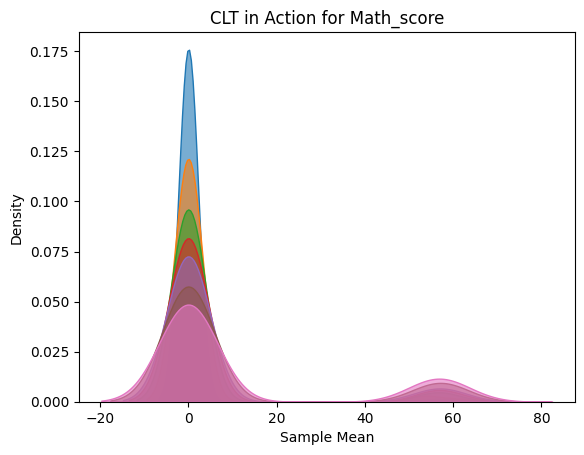

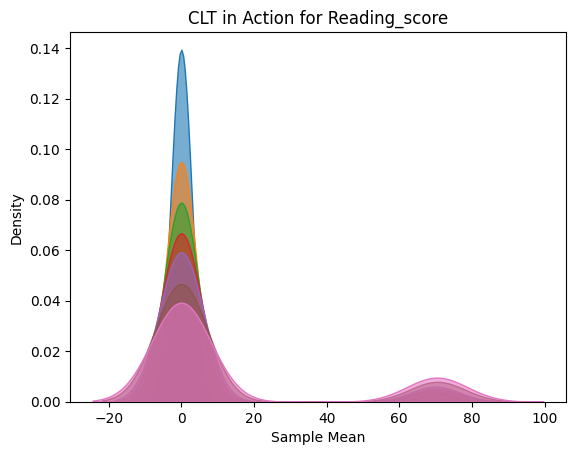

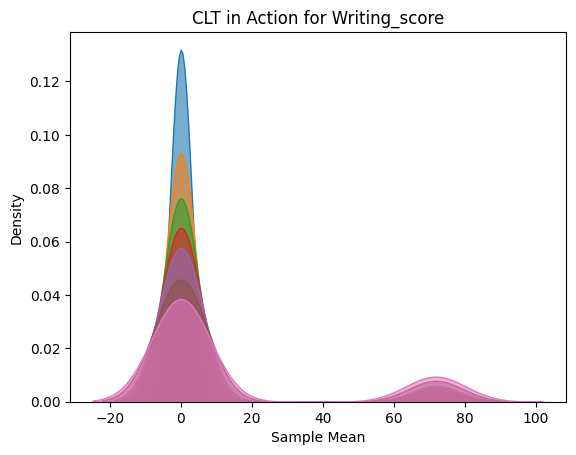

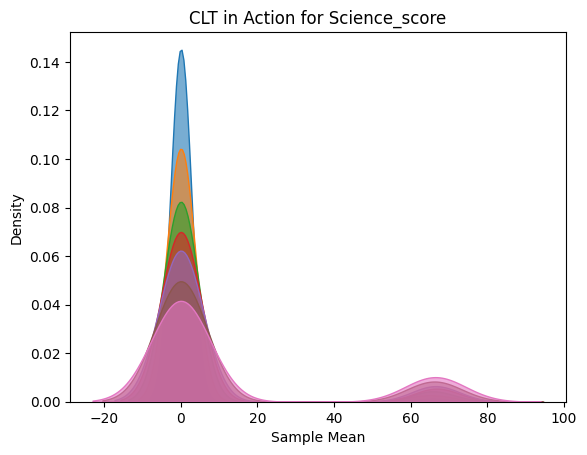

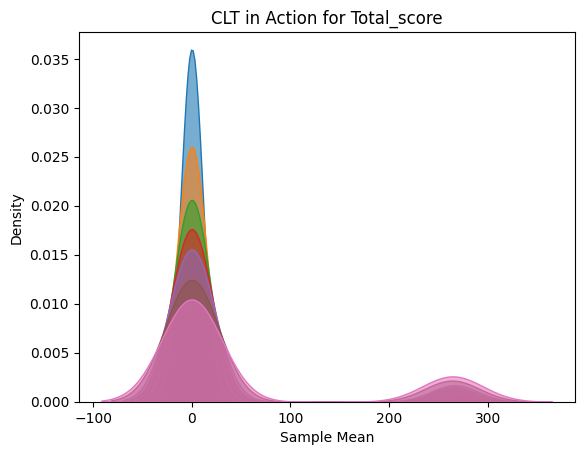

In [24]:
for i, col in enumerate(columns_to_clean):
    plt.figure()
    for sample_size in sample_sizes:
        sample_means = gen_sample_mean(df[col].values, sample_size, num_sample)
        sns.kdeplot(sample_means, fill=True, alpha=0.6)
        plt.title(f"CLT in Action for {col.capitalize()}")
        plt.xlabel("Sample Mean")
        plt.ylabel("Density")
    plt.show()